In [ ]:
#import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
 #Load dataset
df=pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['previous_loan_defaults_on_file', 'loan_intent']
label_encoder=LabelEncoder()
for column in categorical_columns:
  df[column]=label_encoder.fit_transform(df[column])

In [ ]:
df.isnull().sum().sum()

0

there are no missing values in the data set

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,2.525911,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,1.728305,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
selected_features=['previous_loan_defaults_on_file','loan_percent_income','loan_int_rate','loan_intent',"person_income"]
#splitting my data
X=df[selected_features]
Y=df["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, Y_pred)

array([[6593,  391],
       [ 943, 1073]])

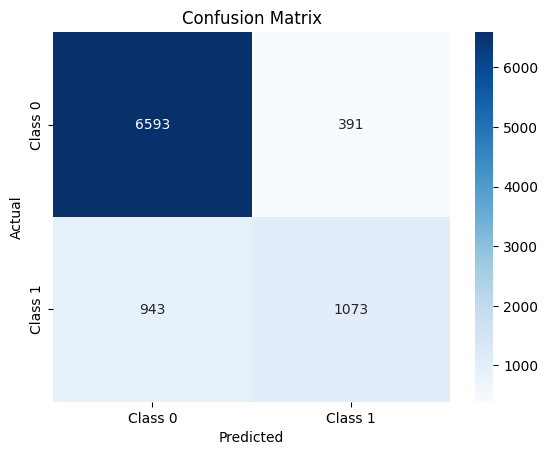

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()